In [1]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF
from msfiltration.graph_sampling import multiscale_sbm

In [3]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

# Repeat computations for several realisations of the network

In [7]:
# Set MS parameters
n_time = 50
min_time = -1.5
max_time = 0.5
n_workers = 4

In [ ]:
# Sample network
A = multiscale_sbm(seed=1)

# initialise MSF object
msf = MSF()

# run MS analysis, build filtration and compute PH
msf.fit_transform(A,min_time,max_time,n_time,n_workers)

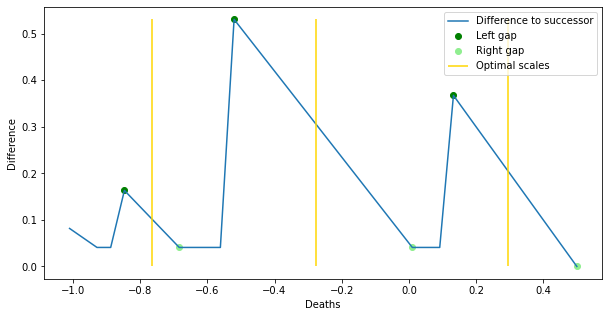

<AxesSubplot:xlabel='Deaths', ylabel='Difference'>

In [6]:
msf.select_scales(threshold_abs=0.1,plot=True)

usetex mode requires dvipng.


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

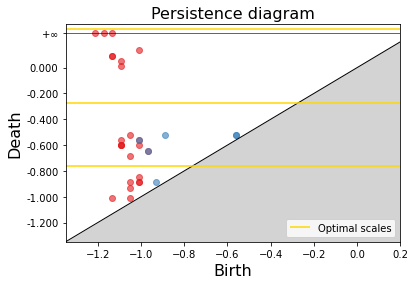

In [7]:
msf.plot_persistence_diagram()

In [8]:
# Sample network
A2 = multiscale_sbm(seed=2)

# initialise MSF object
msf2 = MSF()

# run MS analysis, build filtration and compute PH
msf2.fit_transform(A2,min_time,max_time,n_time)

Running Markov Stability analysis ... 


100%|██████████| 50/50 [00:12<00:00,  3.88it/s]


Building filtration ...


100%|██████████| 50/50 [00:46<00:00,  1.07it/s] 


Computing persistence ... 


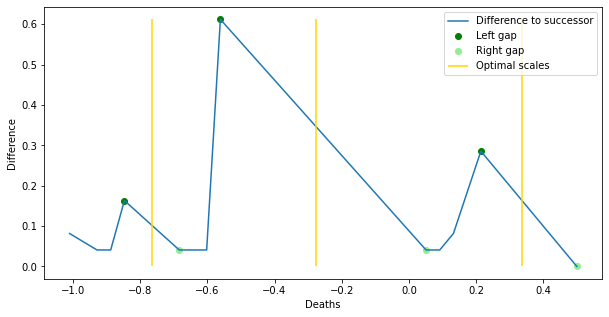

<AxesSubplot:xlabel='Deaths', ylabel='Difference'>

In [9]:
msf2.select_scales(threshold_abs=0.1,plot=True)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

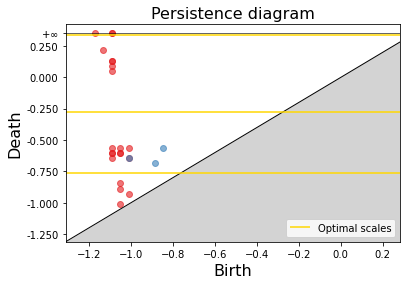

In [10]:
msf2.plot_persistence_diagram()

# Compute bottleneck distance

In [23]:
dgm1 = msf.filtration.persistence_intervals_in_dimension(1)

In [24]:
dgm2 = msf2.filtration.persistence_intervals_in_dimension(1)

In [25]:
gd.bottleneck_distance(dgm1, dgm2)

0.08163265306122447

# Compute Wasserstein distance

In [53]:
import gudhi.wasserstein

In [56]:
gd.wasserstein.wasserstein_distance(dgm1, dgm2)

0.26530612244897955

# Large experiment

In [27]:
# initialise list of persistences
persistences = []

###################
# MSF persistence #
###################

n_realisations = 3

# compute persistence for different realisations
for i in range(n_realisations):
    # Sample network
    A = multiscale_sbm(seed=i)
    n_nodes = A.shape[0]

    # initialise MSF object
    msf = MSF()

    # run MS analysis, build filtration and compute persistence
    msf.fit_transform(A, min_time, max_time, n_time)

    # add persistence of different dimensions to list
    persistences.append(
        [msf.filtration.persistence_intervals_in_dimension(dim) for dim in range(4)]
    )

########################
# bottleneck distances #
########################

# initialsise distances for different dimensions
distances = np.zeros((n_realisations, n_realisations, 4))

for i in range(n_realisations):
    for j in range(i + 1, n_realisations):
        for dim in range(4):
            Dgm_i = persistences[i][dim]
            Dgm_j = persistences[j][dim]
            distances[i, j, dim] = gd.bottleneck_distance(Dgm_i, Dgm_j)
            distances[j, i, dim] = distances[i, j, dim]


Running Markov Stability analysis ... 


100%|██████████| 50/50 [00:10<00:00,  4.61it/s]


Building filtration ...


100%|██████████| 50/50 [00:47<00:00,  1.05it/s] 


Computing persistence ... 
Running Markov Stability analysis ... 


100%|██████████| 50/50 [00:10<00:00,  4.77it/s]


Building filtration ...


100%|██████████| 50/50 [00:46<00:00,  1.08it/s] 


Computing persistence ... 
Running Markov Stability analysis ... 


100%|██████████| 50/50 [00:11<00:00,  4.19it/s]


Building filtration ...


100%|██████████| 50/50 [00:52<00:00,  1.05s/it] 


Computing persistence ... 


TypeError: 'module' object is not callable

In [42]:
# initialsise distances for different dimensions
distances = np.zeros((n_realisations, n_realisations, 4))

for i in range(n_realisations):
    for j in range(i + 1, n_realisations):
        for dim in range(4):
            Dgm_i = persistences[i][dim]
            Dgm_j = persistences[j][dim]
            distances[i, j, dim] = gd.bottleneck_distance(Dgm_i, Dgm_j)
            distances[j, i, dim] = distances[i, j, dim]


In [48]:
distances[:,:,1]

array([[0.0000000e+000, 2.2225753e-308, 2.2225753e-308],
       [2.2225753e-308, 0.0000000e+000, 2.2225753e-308],
       [2.2225753e-308, 2.2225753e-308, 0.0000000e+000]])

# Number of edges in SBM

In [57]:
n_edges = np.zeros(100)
for i in range(100):
    A = multiscale_sbm(seed=i)
    n_edges[i] = (A>0).sum()/2


In [59]:
n_edges.min()

3336.0

In [60]:
n_edges.max()

3555.0

In [61]:
n_edges.mean()

3454.65